# Regular Genomics Project **RNA Localisation**


In [1]:
from plotting import plot_line_graph, multiplot_pearson
from metrics import Pearson
from models import CNN
from utils import prepare_data, set_variables
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

### **1.** Data Preparation

Firstly, we import several necessary packages and load in our data:

In [2]:
train_data, valid_data, test_data = prepare_data()

### **2** |  Initializations

We use as baseline model the [RNATracker](https://github.com/HarveyYan/RNATracker/blob/master/Models/cnn_bilstm_attention.py) model and a CNN model.


In [3]:
max_seq_len = train_data['seq'].apply(lambda x: len(x)).max()
model_name = 'flor_CNN_Att4'
model_architecture_path, model_output_path, params_dataLoader_train, params_dataLoader_valid, params_model, params_train = set_variables(model_name, max_seq_len)

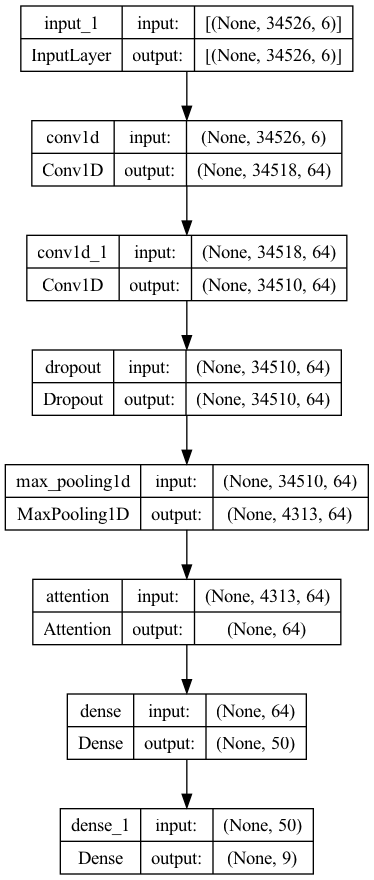

In [4]:
model = CNN(input_size=(max_seq_len, 6),
            params_model=params_model,
            metrics=[Pearson(return_dict=True)]
            )

model.print_model()
# model.summary() #if information about number of params needed

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 34526, 6)]        0         
                                                                 
 conv1d (Conv1D)             (None, 34518, 64)         3456      
                                                                 
 conv1d_1 (Conv1D)           (None, 34510, 64)         36864     
                                                                 
 dropout (Dropout)           (None, 34510, 64)         0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 4313, 64)          0         
 D)                                                              
                                                                 
 attention (Attention)       (None, 64)                7920      
                                                             

In [6]:
history = model.fit_and_evaluate(train_data=train_data, eval_data=valid_data,
                                 params_train_dataLoader=params_dataLoader_train,
                                 params_eval_dataLoader=params_dataLoader_valid,
                                 params_train=params_train,
                                 callback=[EarlyStopping(monitor='loss', patience=3)])

Epoch 1/100
311/311 [==============================] - 564s 2s/step - loss: 3.1595 - ERM: 0.0310 - KDEL: 0.0293 - LMA: -0.0220 - MITO: 0.0201 - NES: -0.0423 - NIK: -0.0531 - NLS: 0.0033 - NUCP: 0.1116 - OMM: 0.0386 - val_loss: 2.3894 - val_ERM: 0.2520 - val_KDEL: -0.1554 - val_LMA: -0.2658 - val_MITO: -0.5440 - val_NES: -0.1830 - val_NIK: -0.0214 - val_NLS: 0.4455 - val_NUCP: -0.2118 - val_OMM: -0.2755
Epoch 2/100
311/311 [==============================] - 621s 2s/step - loss: 2.2829 - ERM: 0.1095 - KDEL: -0.0177 - LMA: 0.0046 - MITO: 0.1561 - NES: 0.0335 - NIK: -0.0622 - NLS: 0.0227 - NUCP: 0.0080 - OMM: 0.0471 - val_loss: 2.2747 - val_ERM: 0.0475 - val_KDEL: 0.2289 - val_LMA: -0.2469 - val_MITO: -0.2314 - val_NES: -0.2752 - val_NIK: 0.0242 - val_NLS: 0.3033 - val_NUCP: -0.0031 - val_OMM: -0.3303
Epoch 3/100
311/311 [==============================] - 650s 2s/step - loss: 2.2409 - ERM: 0.1023 - KDEL: 0.0045 - LMA: 0.0127 - MITO: 0.1905 - NES: 0.0267 - NIK: 0.0147 - NLS: 0.0067 - NUCP: 

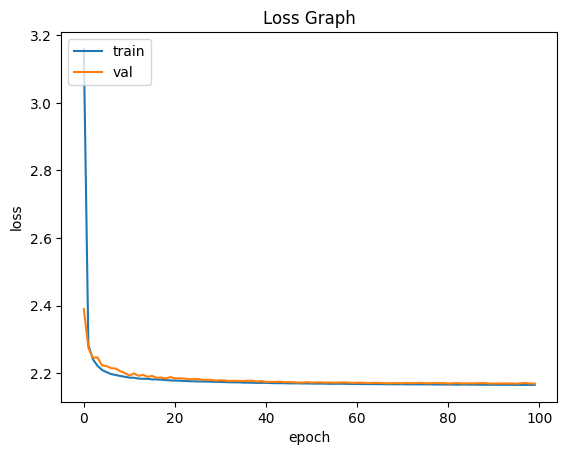

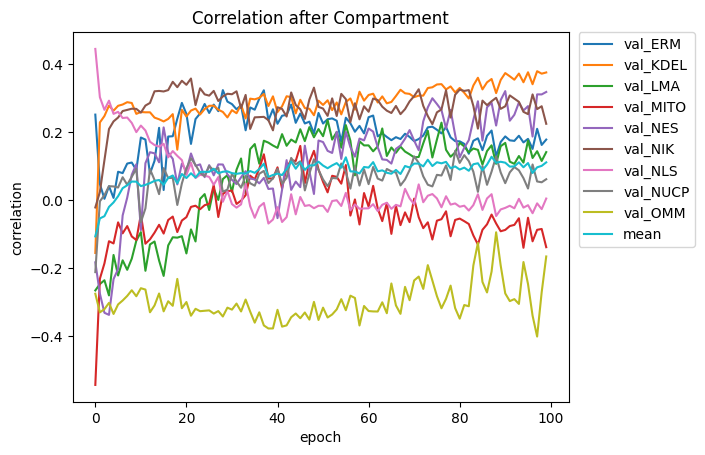

In [7]:
plt_data = [history.history['loss'], history.history['val_loss']]
plot_line_graph(plt_data, "Loss Graph", 'loss', 'epoch', ['train', 'val'])

multiplot_pearson(history.history)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

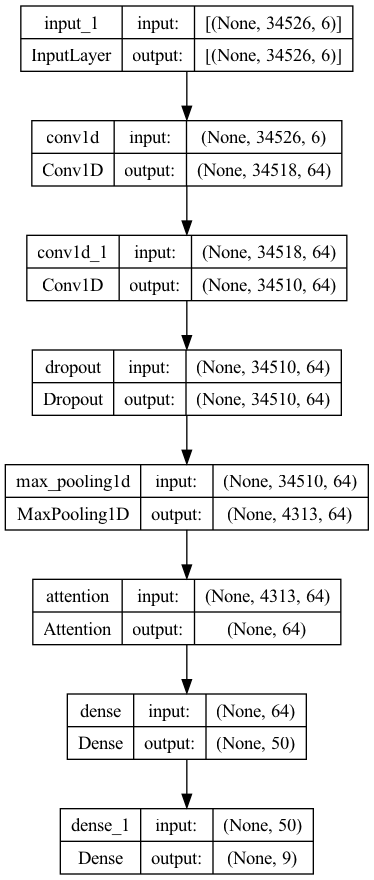

In [8]:
model.print_model(model_architecture_path)
#model.save_model(model_output_path)

In [9]:
model.save_model(model_output_path)